In [1]:
import pandas as pd
import contractions
from Utils.DataPreprocessing import review_length_distribution

In [2]:
imdb_data = pd.read_csv('Data/IMDB Dataset.csv')
imdb_data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [4]:
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [5]:
def data_cleaning(dataset, col_name):
    # Remove the html tags
    dataset[col_name] = dataset[col_name].str.replace('<.*?>', '')

    # Replace the contractions
    dataset[col_name] = dataset[col_name].apply(lambda x: [contractions.fix(word) for word in x.split()])
    dataset[col_name] = dataset[col_name].apply(lambda x: ' '.join(x))
    return dataset

In [6]:
imdb_data = data_cleaning(imdb_data, 'review')
imdb_data.head()

/tmp/ipykernel_30414/3203601952.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset[col_name] = dataset[col_name].str.replace('<.*?>', '')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there is a family where a little boy...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,308
1,A wonderful little production. The filming tec...,positive,156
2,I thought this was a wonderful way to spend ti...,positive,164
3,Basically there is a family where a little boy...,negative,135
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,222
...,...,...,...
49995,I thought this movie did a down right good job...,positive,198
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,108
49997,I am a Catholic taught in parochial elementary...,negative,227
49998,I am going to have to disagree with the previo...,negative,214


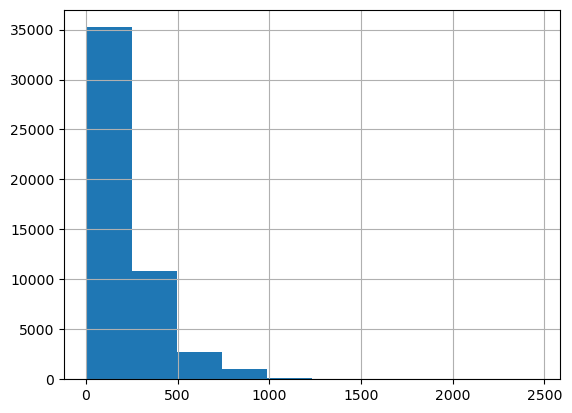

In [7]:
review_length_distribution(imdb_data)

In [8]:
MAX_LEN = 0
for a in range(0 , len(imdb_data)):
    f = imdb_data["review"][a]
    length = len(f.split())
    if length > MAX_LEN:
        MAX_LEN = length
MAX_LEN

2463